# Part I - (Dataset Exploration Title)
## by (Asma Aloui)

## Introduction
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.



## Preliminary Wrangling


In [1]:
! pip install seaborn --upgrade

    100% |████████████████████████████████| 296kB 12.2MB/s ta 0:00:01
    99% |████████████████████████████████| 11.5MB 14.3MB/s eta 0:00:01  8% |██▉                             | 1.0MB 13.7MB/s eta 0:00:01    13% |████▍                           | 1.6MB 13.3MB/s eta 0:00:01    18% |██████                          | 2.1MB 12.5MB/s eta 0:00:01    23% |███████▌                        | 2.7MB 13.0MB/s eta 0:00:01    46% |███████████████                 | 5.4MB 6.0MB/s eta 0:00:02    50% |████████████████▎               | 5.9MB 8.7MB/s eta 0:00:01    55% |█████████████████▉              | 6.4MB 8.0MB/s eta 0:00:01    65% |█████████████████████           | 7.6MB 18.9MB/s eta 0:00:01    76% |████████████████████████▌       | 8.8MB 13.2MB/s eta 0:00:01    85% |███████████████████████████▍    | 9.9MB 8.5MB/s eta 0:00:01    91% |█████████████████████████████▏  | 10.5MB 12.5MB/s eta 0:00:01    95% |██████████████████████████████▋ | 11.1MB 11.4MB/s eta 0:00:01    100% |███████████████████████████

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [3]:
#loading the dataset 
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
#rows and columns
df.shape

(183412, 16)

In [5]:
#information about rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [6]:
df.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

In [7]:
# checking the null values 
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
#all columns in dataset
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [9]:
# check how many values in each user type
df['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

### What is the structure of your dataset?

The dataset contains the details of 183412 trios with 16 attributes

Most variables are numeric in nature, but the variables start_station_name, end_station_name, user_type and member_gender are qualitative nominal variables
### What is/are the main feature(s) of interest in your dataset?

The main features of interest at least for me are: age, user type,time, gender, start and end station

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?


## Data cleaning

1) Define
Dropping the rows that contain null values

In [10]:
#making a copy
ford_bike=df.copy()

In [11]:
#droping all those null values
df.dropna(axis=0,inplace=True)

In [12]:
#testing for changes
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

2) Define
Converting Duration from sec to min by /60 and changing data type
Code

In [13]:
# Changing data type .
df['start_time'] = pd.to_datetime(df['start_time'])
df['start_hour'] = df['start_time'].dt.hour

In [14]:
# changing duration_sec to duration in minutes
df['duration_sec'] = df['duration_sec']/60
#df.rename(columns= {"duration_sec":"duration_min"}, inplace = True )

In [15]:
#testing for changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
duration_sec               174952 non-null float64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_hour                 174952 non-null int64
dtypes: datetime64[ns](1)

In [16]:
#description of the data 
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,start_hour
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,11.733379,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135,13.456165
std,27.370082,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731,4.734282
min,1.016667,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,0.000000
25%,5.383333,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000,9.000000
50%,8.500000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000,14.000000
75%,13.150000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000,17.000000
max,1409.133333,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,23.000000


we can see that the min bornyear is 1878 ,we can consider it as outlier and drop those to 1929 (not more than 90 years )

3) Define
Deleting the age outliers and setting age below 80

In [17]:
#considering from 1939 onwards
Age=df[df.member_birth_year < 1939]
Age

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour
1285,2.466667,2019-02-28 19:29:17.627,2019-02-28 19:31:45.9670,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,5391,Subscriber,1900.0,Male,Yes,19
5197,3.616667,2019-02-28 13:51:46.238,2019-02-28 13:55:24.1270,70.0,Central Ave at Fell St,37.773311,-122.444293,71.0,Broderick St at Oak St,37.773063,-122.439078,5801,Subscriber,1931.0,Male,No,13
5266,6.400000,2019-02-28 13:35:05.428,2019-02-28 13:41:30.2230,84.0,Duboce Park,37.769201,-122.433812,71.0,Broderick St at Oak St,37.773063,-122.439078,6608,Subscriber,1931.0,Male,No,13
5447,2.450000,2019-02-28 13:08:56.935,2019-02-28 13:11:24.0620,84.0,Duboce Park,37.769201,-122.433812,72.0,Page St at Scott St,37.772406,-122.435650,5018,Subscriber,1931.0,Male,No,13
10827,21.916667,2019-02-27 19:21:34.436,2019-02-27 19:43:30.0080,343.0,Bryant St at 2nd St,37.783172,-122.393572,375.0,Grove St at Masonic Ave,37.774836,-122.446546,6249,Subscriber,1900.0,Male,No,19
16087,18.850000,2019-02-27 08:37:36.864,2019-02-27 08:56:28.0220,375.0,Grove St at Masonic Ave,37.774836,-122.446546,36.0,Folsom St at 3rd St,37.783830,-122.398870,4968,Subscriber,1900.0,Male,No,8
17981,6.100000,2019-02-26 19:53:38.528,2019-02-26 19:59:44.9680,50.0,2nd St at Townsend St,37.780526,-122.390288,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,5226,Subscriber,1920.0,Male,No,19
18885,7.200000,2019-02-26 17:48:59.016,2019-02-26 17:56:11.3700,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,50.0,2nd St at Townsend St,37.780526,-122.390288,5319,Subscriber,1920.0,Male,No,17
19375,10.683333,2019-02-26 17:03:19.855,2019-02-26 17:14:01.6190,9.0,Broadway at Battery St,37.798572,-122.400869,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,6164,Customer,1900.0,Male,No,17
20743,6.333333,2019-02-26 10:57:07.767,2019-02-26 11:03:28.1960,26.0,1st St at Folsom St,37.787290,-122.394380,61.0,Howard St at 8th St,37.776513,-122.411306,5387,Subscriber,1933.0,Female,Yes,10


In [18]:
# droping Age > 90 
df.drop(df[(df.member_birth_year < 1929 )].index, inplace = True)

In [19]:
#testing for changes
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,start_hour
count,174875.000000,174875.000000,174875.000000,174875.000000,174875.000000,174875.000000,174875.000000,174875.000000,174875.000000,174875.000000
mean,11.733800,138.981141,37.771206,-122.351758,136.604655,37.771401,-122.351334,4482.518273,1984.839726,13.456172
std,27.375632,111.637185,0.100409,0.117748,111.333687,0.100314,0.117311,1659.218012,9.968641,4.734320
min,1.016667,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1930.000000,0.000000
25%,5.383333,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000,9.000000
50%,8.500000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000,14.000000
75%,13.150000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000,17.000000
max,1409.133333,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,23.000000


4) Define
Age is ok but not that is enought we need to find age in number for better and easy analysis

In [20]:
# Age will have only age in number
df['Age'] = 2019 - df.member_birth_year

In [21]:
#testing for changes
df.Age.head()

0    35.0
2    47.0
3    30.0
4    45.0
5    60.0
Name: Age, dtype: float64

5) Define
Making start time into 2 columns hour and day

In [22]:
# using datatime module to change given formate  
df["start_time"] = pd.to_datetime(df["start_time"])

In [23]:
#testing for changes
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'start_hour', 'Age'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174875 entries, 0 to 183411
Data columns (total 18 columns):
duration_sec               174875 non-null float64
start_time                 174875 non-null datetime64[ns]
end_time                   174875 non-null object
start_station_id           174875 non-null float64
start_station_name         174875 non-null object
start_station_latitude     174875 non-null float64
start_station_longitude    174875 non-null float64
end_station_id             174875 non-null float64
end_station_name           174875 non-null object
end_station_latitude       174875 non-null float64
end_station_longitude      174875 non-null float64
bike_id                    174875 non-null int64
user_type                  174875 non-null object
member_birth_year          174875 non-null float64
member_gender              174875 non-null object
bike_share_for_all_trip    174875 non-null object
start_hour                 174875 non-null int64
Age                      

6) Define
Dropping unwanted columns

In [25]:
#using drop to remove unwanted columns
df = df.drop(['start_time','end_time','start_station_id','start_station_name','start_station_latitude','start_station_longitude','end_station_id','end_station_name','end_station_latitude','end_station_longitude','bike_id','member_birth_year','bike_share_for_all_trip'], axis = 1)

In [26]:
#testing for changes
df.columns

Index(['duration_sec', 'user_type', 'member_gender', 'start_hour', 'Age'], dtype='object')

In [50]:
# add new columns for trip duration in minute

df['duration_minute'] = df['duration_sec']/60

## Data Exploration
As there nothing mentioned on numbers, we are going to explore atleast 3 visulizations from each variate

## Univariate Exploration
Gender <br>
what is the gender distribution of the data?

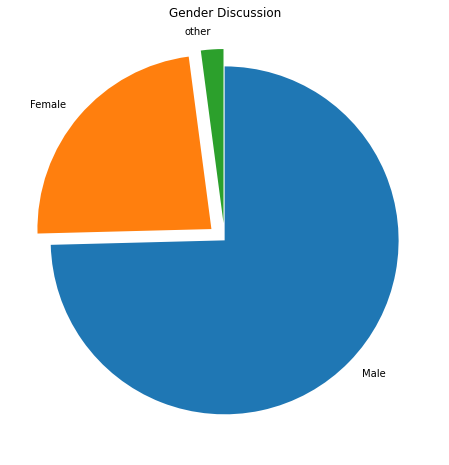

In [27]:
# plotting a pie 
plt.figure(figsize=(8,8))
Gender_counts = df['member_gender'].value_counts()

plt.pie(Gender_counts, labels = ['Male','Female','other'], startangle = 90,explode =(0 , 0.1, 0.1)  ,
        counterclock = False);
plt.title('Gender Discussion');

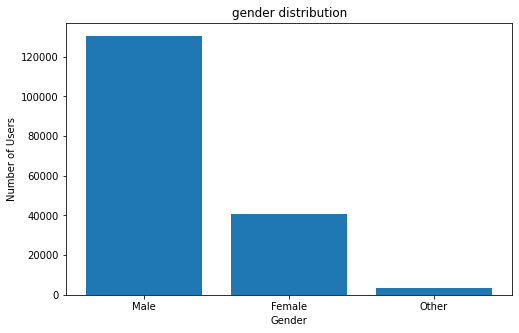

In [31]:
# plotting genders on bar.
plt.figure(figsize=[8,5])
plt.bar(x = df.member_gender.value_counts().keys(), height = df.member_gender.value_counts() )
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.title('gender distribution');
plt.show()



>**Note**: We can have a look at Gender distribution ,female has around 30% ,which mean male use more bikes to ride than female

Subscription <br>
what is the distribution of the subscriptions per user type?

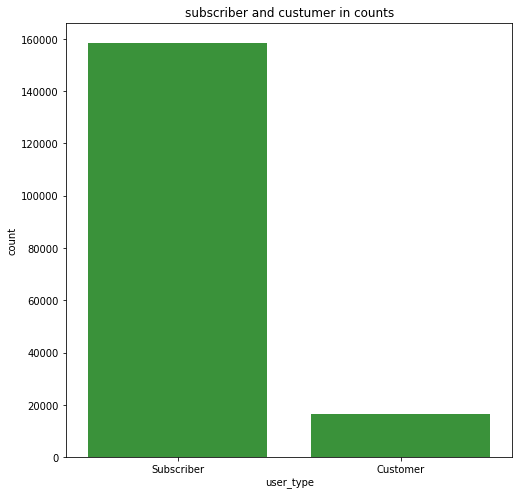

In [28]:
# plotting a bar 
#print(df['user_type'].value_counts())
plt.figure(figsize = (8,8))
sns.countplot(data = df, x = 'user_type', order = df['user_type'].value_counts().index, color = sns.color_palette()[2]);
plt.title('subscriber and custumer in counts');



>**Note**: Note: bike users are mostly subscribers almost 80%

Age <br>
what is the age ditribution?

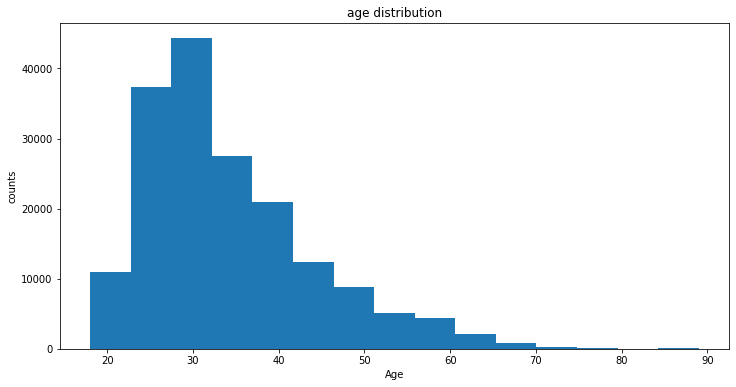

In [29]:
#plotting a histogram to check the count for perticular age 
plt.figure(figsize=(12,6))
plt.hist(df['Age'],bins = 15);
plt.title('age distribution');
plt.xlabel('Age');
plt.ylabel('counts');

>**Note**: Most of bike users are around 30 and between 20-50

 Duration_sec <br>
 what is the distribution of th duration?

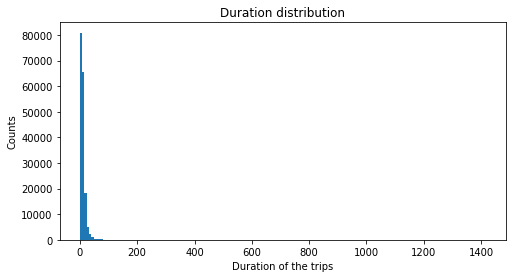

In [30]:
# plot histogram to check the distribution of durations

binsize = 8
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 4])

plt.hist(data = df, x = 'duration_sec', bins=bins);

plt.title('Duration distribution');
plt.xlabel('Duration of the trips');
plt.ylabel('Counts');

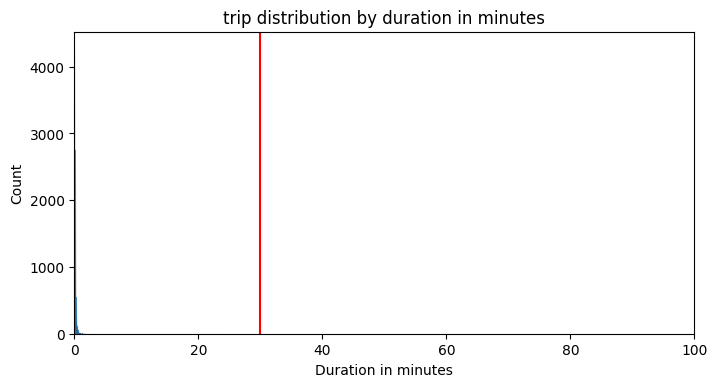

In [54]:
# trip distribution by duration
plt.figure(figsize = (8, 4),dpi = 100)

sns.histplot(data = df, x = 'duration_minute')
plt.xlim(0, 100)
plt.title("trip distribution by duration in minutes")
plt.xlabel('Duration in minutes')
plt.ylabel('Count')
plt.axvline(x=30, color = "red")
plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The dataset contains many males than females.
> subscribers are more than customers
> The duration in secs of the trips are most of them in between 200 to 1000...meaning that most trip are less then 15 minutes! Which makes a lot of sense because this service works with single rides (up to 30 minutes)T

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The age attribute had some outliers that may change the distribution, so I restricted the age range to be below 90
> converted birth year data numbers and time to hour day and finally dropped some unwanted columns

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

what is Users Birth Year and Trip Duration in Seconds ?

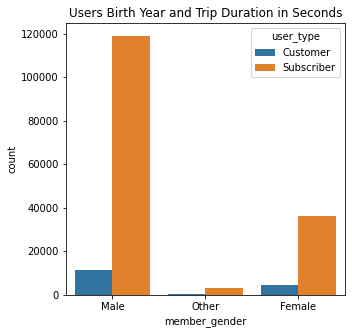

In [32]:
plt.figure(figsize = [5, 5]);

sns.countplot(data = df, x = 'member_gender', hue = 'user_type');

plt.title('Users Birth Year and Trip Duration in Seconds');

Note: irrespective of the gender only subscriber user number are way greater

dependency of trip durations on gender and on member type. <br>
Question : what is the relationship between trip durations and  gender , and  member type?

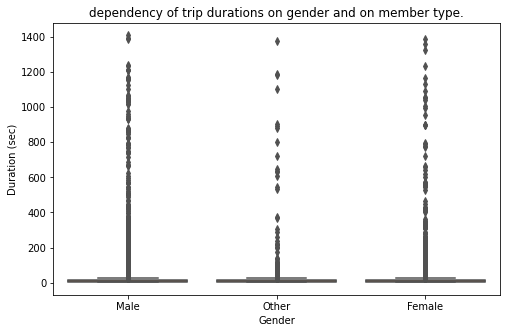

In [34]:
plt.figure(figsize = [8, 5])
base_color = sns.color_palette()[1]
sns.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.xlabel('Gender')
plt.ylabel('Duration (sec)')
plt.title('dependency of trip durations on gender and on member type.')
plt.show()

As we can see, values are vey widespread to see a box plot, so lets trim duration to max 2000 sec to get clearer picture.

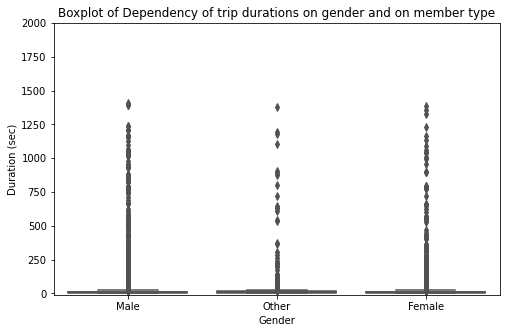

In [43]:
#boxplot
plt.figure(figsize = [8, 5])
base_color = sns.color_palette()[1]
sns.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.ylim([-10, 2000])
plt.xlabel('Gender')
plt.ylabel('Duration (sec)')
plt.title('Boxplot of Dependency of trip durations on gender and on member type')
plt.show()

Though quantity of male riders are very high then other and female but we can see that higher percentage of female and other rides longer trips then males.

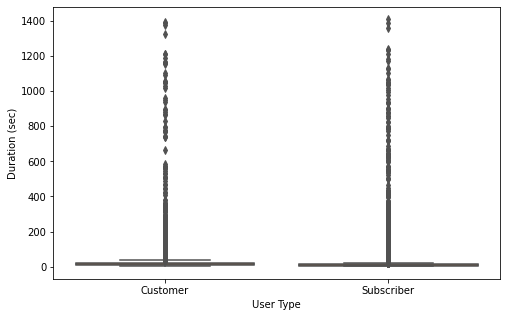

In [36]:
plt.figure(figsize = [8, 5])
base_color = sns.color_palette()[1]
sns.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.xlabel('User Type')
plt.ylabel('Duration (sec)')
plt.show()

As we can see, values are vey widespread to see a box plot, so lets trim duration to max 2500 sec to get clearer picture.

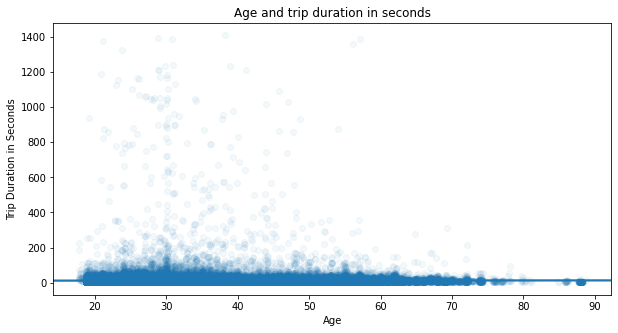

In [37]:
# plotting to find the duration taken as per their age
plt.figure(figsize=[10, 5])
#sns.regplot(data = df, x='Age', y='duration_sec'truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});
sns.regplot(data = df, x = 'Age', y = 'duration_sec', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});
plt.ylabel('Trip Duration in Seconds');
plt.title('Age and trip duration in seconds');

Note: People between 20 and 40 years old tends to take more time in taking trips.

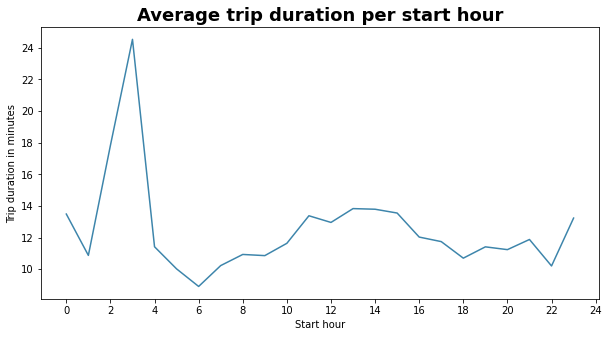

In [38]:
# plotting line chart to find peak times 
df.groupby('start_hour')['duration_sec'].mean().plot(kind='line', figsize=(10,5) ,color='#3d85ab')
plt.title('Average trip duration per start hour' , fontsize=18 , fontweight='bold')
plt.ylabel('Trip duration in minutes')
plt.xlabel('Start hour')
plt.xticks([x for x in range(0,25, 2)])
plt.yticks(rotation=360);
plt.savefig('vis9.png',dpi=80, bbox_inches = "tight")
plt.show()

Note: peaks at 1-4 and good at 9-18

Note: The duartion increases when the trip start hour is between 1-3.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> as expected subscribes are have more time and count than customers
> The relationship between the trip duration and age is intresting especially because it shows how the duration decreases with age.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The distributions seem normal and logical.
> one month data may not me suffient to analasis and have a wholesome idea to conclude

## Multivariate Exploration

Gender, user type and duration

Text(0.5, 1.0, 'distribution of duration across genders and user types')

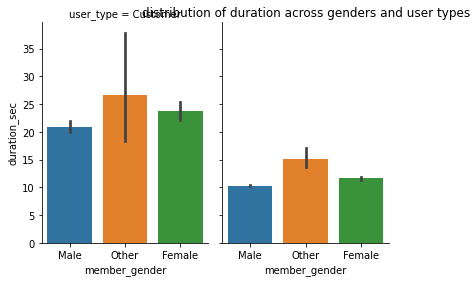

In [44]:
sns.catplot(x = "member_gender", y = "duration_sec",
                col = "user_type",
                data = df, kind = "bar",
                height=4, aspect=.7);
plt.title('distribution of duration across genders and user types')

* Customers have a higher mean trip duration, but now we can see this is true across all genders.
* but now we can see this is true across all genders.

Start_hour ,duration_sec and user_type

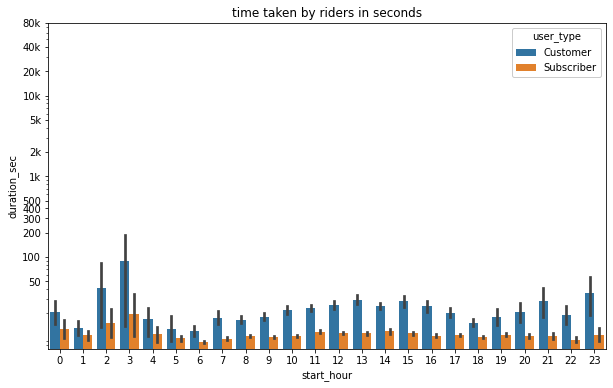

In [40]:
plt.figure(figsize=[10,6])
ax = sns.barplot(data = df, x = 'start_hour', y = 'duration_sec', hue = 'user_type')
ax.legend(loc = 1, framealpha = 1, title = 'user_type')
plt.yscale('log')
plt.yticks([50,100,200,300,400,500, 1e3, 2e3, 5e3, 1e4, 2e4,4e4,8e4], [50,100,200,300,400,500, '1k', '2k', '5k', '10k', '20k','40k','80k']);
plt.title('time taken by riders in seconds');

customers have high time than subscribers,subscriber type 2 AM, 3 AM the duration of biking is longer than any hour

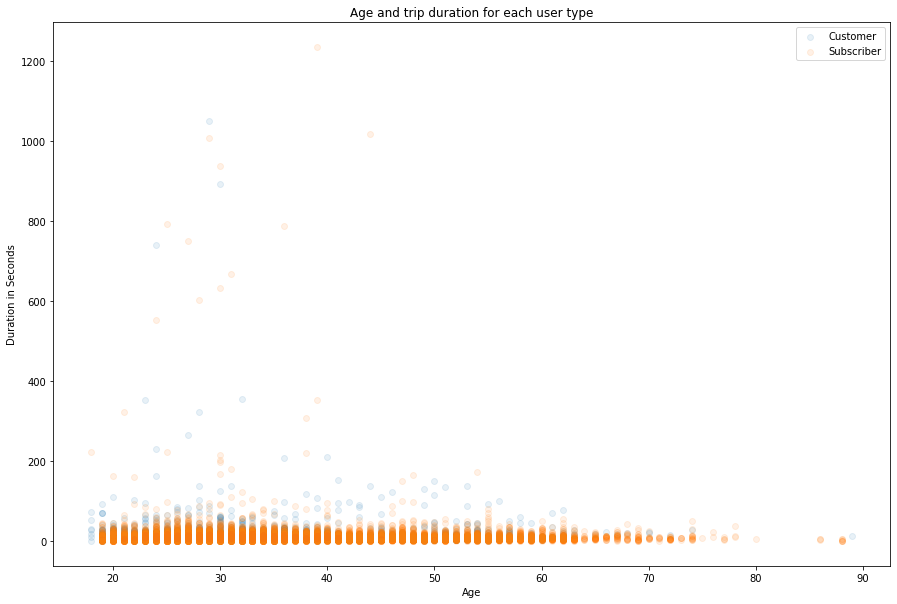

In [41]:
# plotting a scatterplot  
df1 = df.sample(20000, random_state=1)

plt.figure(figsize = [15, 10]);
user_type_markers = [['Customer', 'o'],
               ['Subscriber', 'x']]

for cat, marker in user_type_markers:
    df_cat = df1[df1['user_type'] == cat]
    plt.scatter(data = df_cat, x = 'Age', y = 'duration_sec', alpha=2/20);
plt.legend(['Customer','Subscriber']);
plt.xlabel('Age');
plt.ylabel('Duration in Seconds');
plt.title("Age and trip duration for each user type");

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>Younger Customers trip duration is slightly more than younger subscribers.
>The majority of older users are Subscribers and they spend little time in their bike trips.

### Were there any interesting or surprising interactions between features?

> no

## Conclusions
I started with a raw dataset of 183,412 rows and 16 columns of San Francisco cyclists.

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The dataset was contained in a file 201902-fordgobike-tripdata.csv downloaded from Ford GoBike. It includes 183,412 trips and 16 features including trip duration, member gender and stations' longitudes and latitudes.

This data was only for trips in February, 2019.

I undertook the following steps in the analysis of this project.

1. Data Assessment & Cleaning

The raw data has some quality and structural issues I had to tackle with. To begin with, I assessed each column individually. In doing so, I observed some issues like the presence of NaNs in the _member_birthyear and station identification columns; some of the columns, like member_gender were in an inappropriate datatype; and then the presence of invalid values in the member_birth_year column.

I tackled all issues identified in the Cleaning Section according to the recommended Define - Clean - Test framework

2. Feature Engineering

I had some ideas for features that could be engineered to better make sense of the data. So I proceeded to engineer the following features:

Duration of trip in minutes (more easy to grasp than in seconds); by dividing _durationsec by 60
Age: by subtracting member_birth_year from 2019, the year in which the data was collected
Age brackets: by grouping cyclists into age brackets
Distance: by using the h3 module to calculate distance between points denoted by latitudes and longitudes
Average speed of trip: by dividing distance by duration
Route of trip; by concatenating start_station_name and end_station_name

After engineering these features, I performed sanity checks on them before proceeding in the analysis. Afterwards, I dropped the following columns as they were either redundant or uninteresting to me: duration_sec, start_station_name, end_station_name, start_station_id, start_station_latitude, start_station_longitude, end_station_id, end_station_latitude, end_station_longitude, member_birth_year,

After cleaning and feature engineering, I had with me a dataset comprising 171,416 rows each representing a single bike ride in the greater San Francisco Bay area, as characterized by 9 variables, 3 of which are numeric, 1 is object, 3 are categorical and 2 are datetimes

3. Univariate Exploration.

I analyzed the distribution of each variable systematically. The distributions of the variables _distancekm and _durationmin were heavily skewed to the right so I replotted their distributions on a logarithmic scale.

The datetime variables revealed a lot of interesting patterns in the habits of the bikers. For example, Cyling activities reduce on weekends and peaks on Thursdays. Also, the hourly distribution of cycling activity follows a bimodal distribution with peaks in the morning and in the evening. Presumably corresponding to the morning and evening rush hours.

I also found that men constitute the bulk of the data.
4. Bivariate Exploration.

There exists a slight positive correlation between average trip speeds and distance travelled. Also, different genders tend to take different routes.

Men tend to have higher average speeds while women and the undisclosed genders tend to have longer trip durations. Surprisingly, seniors and elderly adults tend to have longer trip times too but this is not a robust finding due to their relatively low population in the data.

Middle-aged adults are more active than young adults during workdays but that trend reverses during the weekends. Also, middles-aged adults are more active in the rush hours of the morning and evening.

I also observed that the Berry St at 4th St - San Francisco Ferry Building (Harry Bridges Plaza) route carries the fastest traffics and that the Grand Ave at Perkins St - 19th Street BART Station route was more popular in the morning hours, and the Berry St at 4th St - San Francisco Ferry Building (Harry Bridges Plaza) in the evenings

5. Multivariate Exploration

Generally, the trend of middle-aged adults having the highest average speeds holds even when faceted by a third variable. Also, suscribers tend to have higher average speeds than customers

## Limitations
I made the following assumption about the data that may not be true at all times.
Bikers did not stop at any point throughout the trip
I bucketed the age variable into 4 groups. This might obscure some trends in the data.

Except for the insights derived from the Seaborn pointplot functionality, findings were not statistically tested and should not be extrapolated to the whole population of the greater San Francisco bay area.